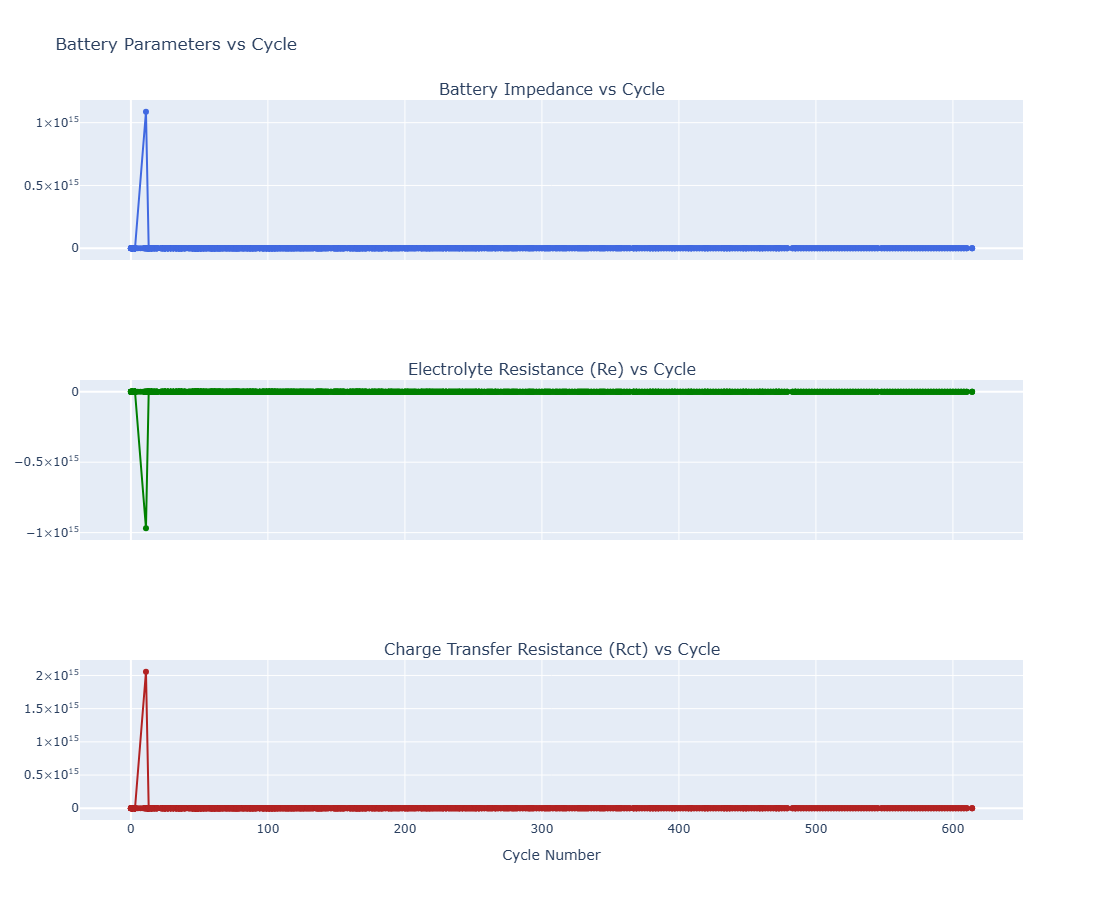

In [7]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Step 1: Load and Preprocess Data

# Load dataset
file_path = "C:/Users/asus/Desktop/cleaned_dataset/metadata.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Filter for relevant test type (impedance)
data_impedance = data[data['type'] == 'impedance'].copy()

# Convert `Re` and `Rct` to numeric (handling non-numeric values)
data_impedance['Re'] = pd.to_numeric(data_impedance['Re'], errors='coerce')
data_impedance['Rct'] = pd.to_numeric(data_impedance['Rct'], errors='coerce')

# Handle missing values with interpolation (linear method)
data_impedance['Re'] = data_impedance['Re'].interpolate(method='linear')
data_impedance['Rct'] = data_impedance['Rct'].interpolate(method='linear')

# Drop any remaining rows with NaN (optional after interpolation)
data_cleaned = data_impedance.dropna(subset=['Re', 'Rct']).copy()

# Introduce `Battery_impedance` as the sum of `Re` and `Rct`
data_cleaned['Battery_impedance'] = data_cleaned['Re'] + data_cleaned['Rct']

# Use `test_id` or `uid` as a proxy for cycle number
data_cleaned['cycle_number'] = data_cleaned['test_id']

# Step 2: Visualize Data

# Create a subplot figure for all metrics
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=["Battery Impedance vs Cycle",
                                    "Electrolyte Resistance (Re) vs Cycle",
                                    "Charge Transfer Resistance (Rct) vs Cycle"])

# Add Battery Impedance plot
fig.add_trace(go.Scatter(x=data_cleaned['cycle_number'], y=data_cleaned['Battery_impedance'],
                         mode='lines+markers', name="Battery Impedance",
                         line=dict(color='royalblue')), row=1, col=1)

# Add Re (Electrolyte Resistance) plot
fig.add_trace(go.Scatter(x=data_cleaned['cycle_number'], y=data_cleaned['Re'],
                         mode='lines+markers', name="Electrolyte Resistance (Re)",
                         line=dict(color='green')), row=2, col=1)

# Add Rct (Charge Transfer Resistance) plot
fig.add_trace(go.Scatter(x=data_cleaned['cycle_number'], y=data_cleaned['Rct'],
                         mode='lines+markers', name="Charge Transfer Resistance (Rct)",
                         line=dict(color='firebrick')), row=3, col=1)

# Update layout for clarity
fig.update_layout(height=900, width=1000, title_text="Battery Parameters vs Cycle",
                  xaxis3=dict(title="Cycle Number"),
                  showlegend=False)

# Show the figure
fig.show()
